In [ ]:
# Importar Bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Dataset y su visualización

dfIris = pd.read_csv("/content/drive/MyDrive/Prácticas Machine Learning/Práctica5_Naïve Bayes_Machine_Learning/iris.csv")
dfIris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x, y = dfIris.drop("species", axis=1).values, dfIris["species"].values

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)


In [ ]:
kf = KFold(n_splits=5)

# Funcion para validación cruzada

def validacionCruzada(model, x_train, y_train, kf):
    accuracies = []
    for train_index, test_index in kf.split(x_train):
        X_train_fold, X_test_fold = x_train[train_index], x_train[test_index]
        y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]

        model.fit(X_train_fold, y_train_fold)
        score = model.score(X_test_fold, y_test_fold)
        accuracies.append(score)

    return np.array(accuracies)
gnb_iris = GaussianNB()
mnb_iris = MultinomialNB()
gnb_iris_accuracies = validacionCruzada(gnb_iris, x_train, y_train, kf)
mnb_iris_accuracies = validacionCruzada(mnb_iris, x_train, y_train, kf)

def imprimir(nombre, accuracies):
    print(nombre)
    for i, acc in enumerate(accuracies):
        print(f"pliegue {i+1}: {acc}")
    print("Promedio: ", accuracies.mean())

imprimir("Gauss", gnb_iris_accuracies)
imprimir("Multinomial", mnb_iris_accuracies)

Gauss
pliegue 1: 0.8571428571428571
pliegue 2: 0.9523809523809523
pliegue 3: 1.0
pliegue 4: 1.0
pliegue 5: 0.9047619047619048
Promedio:  0.9428571428571428
Multinomial
pliegue 1: 0.5714285714285714
pliegue 2: 0.7142857142857143
pliegue 3: 0.9523809523809523
pliegue 4: 0.6666666666666666
pliegue 5: 0.5714285714285714
Promedio:  0.6952380952380952


reporte de clasificacion de GaussianNB_iris
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



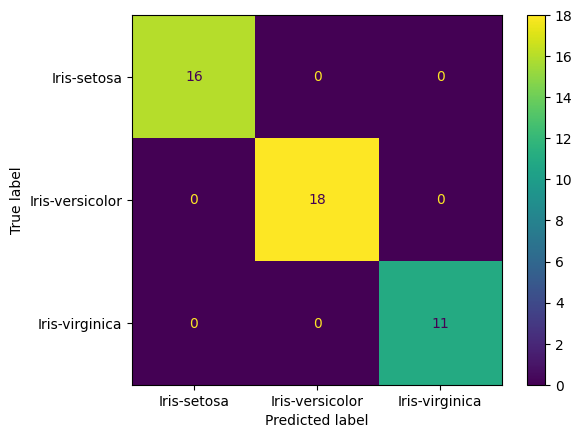

In [ ]:
if gnb_iris_accuracies.mean() > mnb_iris_accuracies.mean():
    modelo_chido, nombre = gnb_iris, "GaussianNB_iris"
else:
    modelo_chido, nombre = mnb_iris, "MultinomialNB_iris"

modelo_chido.fit(x_train, y_train)
prediccion = modelo_chido.predict(x_test)
print(f"reporte de clasificacion de {nombre}")
print(classification_report(y_test, prediccion))

# Matriz de confusión

matriz_de_conf = confusion_matrix(y_test, prediccion)
matriz = ConfusionMatrixDisplay(confusion_matrix=matriz_de_conf,display_labels=modelo_chido.classes_)
matriz.plot()
plt.show()

### Programa 2

In [ ]:
# Dataset y su visualización

dfEmails = pd.read_csv("/content/drive/MyDrive/Prácticas Machine Learning/Práctica5_Naïve Bayes_Machine_Learning/emails.csv").iloc[:, 1:]
dfEmails

x,y = dfEmails.drop("Prediction", axis=1).values, dfEmails["Prediction"].values
x,y

(array([[ 0,  0,  1, ...,  0,  0,  0],
        [ 8, 13, 24, ...,  0,  1,  0],
        [ 0,  0,  1, ...,  0,  0,  0],
        ...,
        [ 0,  0,  1, ...,  0,  0,  0],
        [ 2,  7,  1, ...,  0,  1,  0],
        [22, 24,  5, ...,  0,  0,  0]]),
 array([0, 0, 0, ..., 1, 1, 0]))

In [ ]:
# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)

x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y,test_size=0.3,random_state=0)

kf2 = KFold(n_splits=5)

gnb_emails = GaussianNB()
mnb_emails = MultinomialNB()
gnb_emails_accuracies = validacionCruzada(gnb_emails,x_train2, y_train2, kf2)
mnb_emails_accuracies = validacionCruzada(mnb_emails, x_train2, y_train2, kf2)

imprimir("Gauss", gnb_emails_accuracies)
imprimir("Multinomial", mnb_emails_accuracies)


Gauss
pliegue 1: 0.9475138121546961
pliegue 2: 0.9571823204419889
pliegue 3: 0.9502762430939227
pliegue 4: 0.9516574585635359
pliegue 5: 0.9447513812154696
Promedio:  0.9502762430939227
Multinomial
pliegue 1: 0.9516574585635359
pliegue 2: 0.9447513812154696
pliegue 3: 0.9433701657458563
pliegue 4: 0.9461325966850829
pliegue 5: 0.9433701657458563
Promedio:  0.9458563535911602


reporte de clasificacion de GaussianNB_emails:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1111
           1       0.88      0.95      0.91       441

    accuracy                           0.95      1552
   macro avg       0.93      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



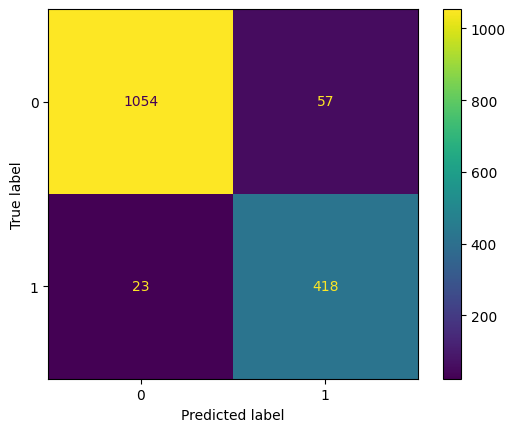

In [ ]:
if gnb_emails_accuracies.mean() > mnb_emails_accuracies.mean():
    modelo_chido2, nombre2 = gnb_emails, "GaussianNB_emails"
else:
    modelo_chido2, nombre2 = mnb_emails, "MultinomialNB_emails"

modelo_chido2.fit(x_train2, y_train2)
prediccion2 = modelo_chido2.predict(x_test2)
print(f"reporte de clasificacion de {nombre2}:")
print(classification_report(y_test2, prediccion2))
matriz_de_conf2 = confusion_matrix(y_test2, prediccion2)
matriz2 = ConfusionMatrixDisplay(confusion_matrix=matriz_de_conf2, display_labels=modelo_chido2.classes_)
matriz2.plot()
plt.show()

### Tabla 1 Resultados de la validación cruzada

In [ ]:
ancho_dataset = 10
ancho_pliegues = 12
ancho_distrib = 15
ancho_pliegue = 10
ancho_accuracy = 10

def fila(dataset, pliegues, distribucion, pliegue, accuracy):
    """Imprime una fila de la tabla con el formato especificado."""
    print(f"{dataset:<{ancho_dataset}} {pliegues:<{ancho_pliegues}} {distribucion:<{ancho_distrib}} {pliegue:<{ancho_pliegue}} {accuracy:<{ancho_accuracy}}")

fila("Dataset", "No. Pliegues", "Distribución", "Pliegue", "Accuracy")
print("-"*(ancho_dataset+1+ancho_pliegues+1+ancho_distrib+1+ancho_pliegue+1+ancho_accuracy))

# Normal iris
fila("iris.csv", "5", "Normal", "1", f"{gnb_iris_accuracies[0]:}")
fila("", "", "", "2", f"{gnb_iris_accuracies[1]:}")
fila("", "", "", "3", f"{gnb_iris_accuracies[2]:}")
fila("", "", "", "4", f"{gnb_iris_accuracies[3]:}")
fila("", "", "", "5", f"{gnb_iris_accuracies[4]:}")
fila("", "", "", "Promedio", f"{gnb_iris_accuracies.mean():}")

# Multinomial iris
fila("", "", "Multinomial", "1", f"{mnb_iris_accuracies[0]:}")
fila("", "", "", "2", f"{mnb_iris_accuracies[1]:}")
fila("", "", "", "3", f"{mnb_iris_accuracies[2]:}")
fila("", "", "", "4", f"{mnb_iris_accuracies[3]:}")
fila("", "", "", "5", f"{mnb_iris_accuracies[4]:}")
fila("", "", "", "Promedio", f"{mnb_iris_accuracies.mean():}")

print()

# Normal email
fila("emails.csv", "5", "Normal", "1", f"{gnb_emails_accuracies[0]:}")
fila("", "", "", "2", f"{gnb_emails_accuracies[1]:}")
fila("", "", "", "3", f"{gnb_emails_accuracies[2]:}")
fila("", "", "", "4", f"{gnb_emails_accuracies[3]:}")
fila("", "", "", "5", f"{gnb_emails_accuracies[4]:}")
fila("", "", "", "Promedio", f"{gnb_emails_accuracies.mean():}")

# Multinomial email
fila("", "", "Multinomial", "1", f"{mnb_emails_accuracies[0]:}")
fila("", "", "", "2", f"{mnb_emails_accuracies[1]:}")
fila("", "", "", "3", f"{mnb_emails_accuracies[2]:}")
fila("", "", "", "4", f"{mnb_emails_accuracies[3]:}")
fila("", "", "", "5", f"{mnb_emails_accuracies[4]:}")
fila("", "", "", "Promedio", f"{mnb_emails_accuracies.mean():}")


Dataset    No. Pliegues Distribución    Pliegue    Accuracy  
-------------------------------------------------------------
iris.csv   5            Normal          1          0.8571428571428571
                                        2          0.9523809523809523
                                        3          1.0       
                                        4          1.0       
                                        5          0.9047619047619048
                                        Promedio   0.9428571428571428
                        Multinomial     1          0.5714285714285714
                                        2          0.7142857142857143
                                        3          0.9523809523809523
                                        4          0.6666666666666666
                                        5          0.5714285714285714
                                        Promedio   0.6952380952380952

emails.csv 5            Normal          1          

### Tabla 2. Resultados de las pruebas finales

In [ ]:

def obtener_distribucion(nombre_modelo):
    if "Gaussian" in nombre_modelo:
        return "Normal"
    elif "Multinomial" in nombre_modelo:
        return "Multinomial"
    else:
        return "Desconocida"

dist_iris = obtener_distribucion(nombre)
dist_emails = obtener_distribucion(nombre2)

print("Tabla 2. Resultados de las pruebas finales")
print()
ancho_dataset = 10
ancho_distribucion = 14
ancho_accuracy = 10

print(f"{'Dataset':<{ancho_dataset}} {'Distribución':<{ancho_distribucion}} {'Accuracy':<{ancho_accuracy}}")
print("-"*(ancho_dataset + 1 + ancho_distribucion + 1 + ancho_accuracy))

# Fila para iris
print(f"{'iris.csv':<{ancho_dataset}} {dist_iris:<{ancho_distribucion}} {acc_iris_final:<{ancho_accuracy}}")

# Fila para emails
print(f"{'emails.csv':<{ancho_dataset}} {dist_emails:<{ancho_distribucion}} {acc_emails_final:<{ancho_accuracy}}")


Tabla 2. Resultados de las pruebas finales

Dataset    Distribución   Accuracy  
------------------------------------
iris.csv   Normal         1.0       
emails.csv Normal         0.9484536082474226
